In [146]:
import numpy as np
import xarray as xr
import glob
import os

In [ ]:
# data_path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/fquareng/data"
data_path = "/Users/fquareng/data/"
dem_path = "dem_squares"
source_path = "1h_2D_sel_cropped_gridded_clustered_threshold_blurred/cluster_7/"
target_path = "1h_2D_sel_cropped_gridded_clustered_threshold/cluster_7/"


In [177]:
source_files = sorted(glob.glob(os.path.join(data_path, source_path, "6_5_lffd20101113050000_blurred_x8.nz")))
target_files = sorted(glob.glob(os.path.join(data_path, target_path, "6_5_lffd20101113050000.nz")))

print(source_files)
print(target_files)

['/Users/fquareng/data/1h_2D_sel_cropped_gridded_clustered_threshold_blurred/cluster_7/6_5_lffd20101113050000_blurred_x8.nz']
['/Users/fquareng/data/1h_2D_sel_cropped_gridded_clustered_threshold/cluster_7/6_5_lffd20101113050000.nz']


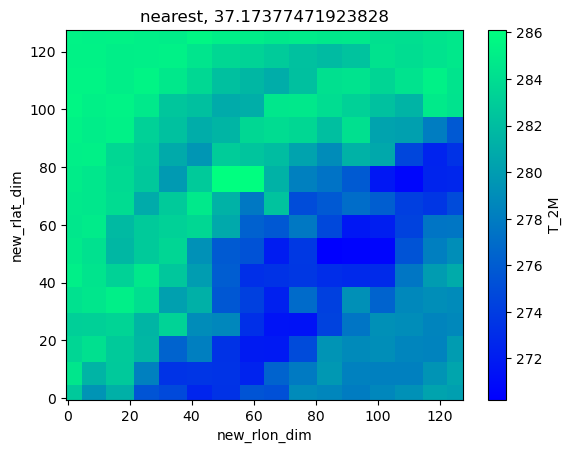

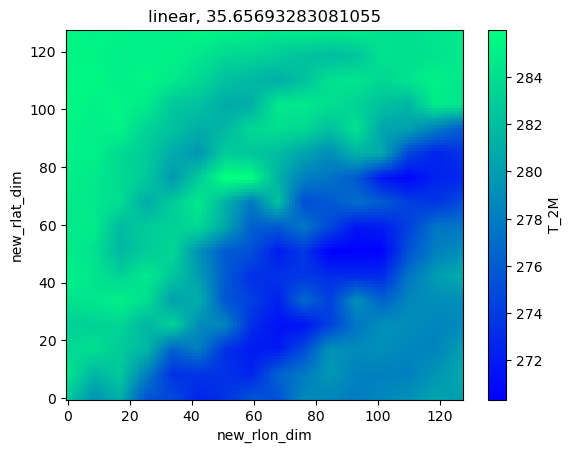

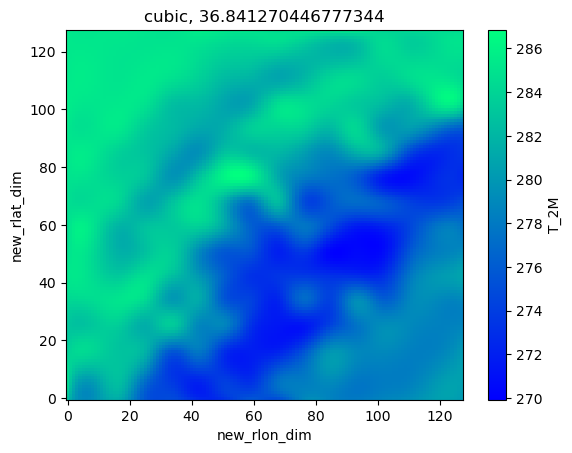

In [204]:
import matplotlib.pyplot as plt

# Load the original NetCDF file and create variables for input data, latitude (lat), and longitude (lon)
ds = xr.open_mfdataset(source_files)
data = ds['T_2M'] 

upscale_factor = 8

# Define the number of points for each new latitude and longitude grid
num_points_x = len(ds.rlon) * upscale_factor
num_points_y = len(ds.rlat) * upscale_factor

# Create arrays for the new latitudes and longitudes using numpy's linspace()
new_rlon = np.linspace(ds.rlon.values[0], ds.rlon.values[-1], num=num_points_x)
new_rlat = np.linspace(ds.rlat.values[0], ds.rlat.values[-1], num=num_points_y)

# Create the new coordinates using xr.DataArray
new_grid = xr.Dataset(
    coords={
        'rlon': ('new_rlon_dim', new_rlon),
        'rlat': ('new_rlat_dim', new_rlat)
    }
)

methods_to_test = ['nearest', 'linear', 'cubic']

# Interpolate over rlon and rlat dimensions only
for method in methods_to_test:
    interpolated_ds = ds.interp(
        rlon=new_grid['rlon'],
        rlat=new_grid['rlat'],
        method=method
    )
    interpolated_ds["T_2M"].plot(cmap="winter")
    diff = data - interpolated_ds["T_2M"]
    squared_diff = diff**2
    mse = squared_diff.mean().values
    plt.title(f"{method}, {mse}")
    plt.show()

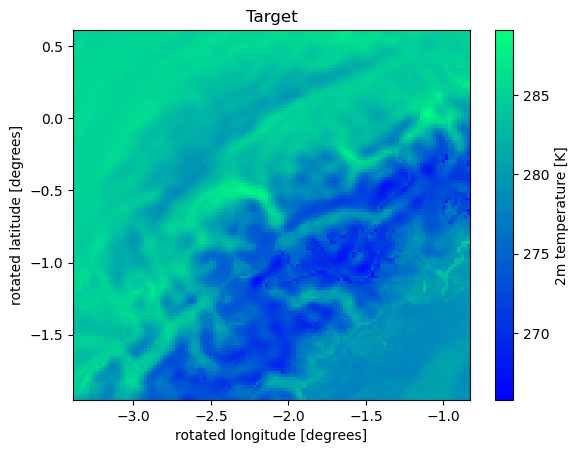

In [205]:
ds = xr.open_mfdataset(target_files)
ds['T_2M'].plot(cmap="winter")
plt.title("Target")
plt.show()

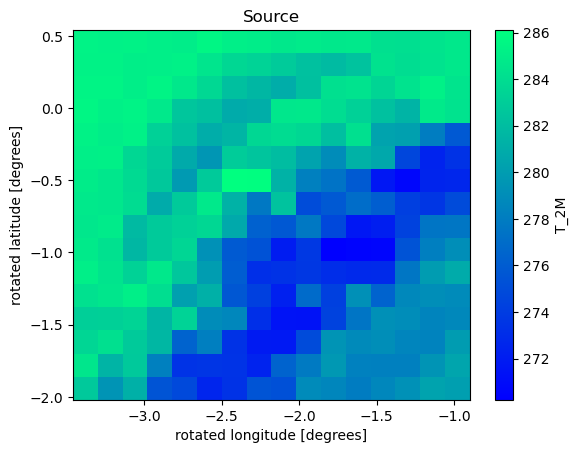

In [208]:
ds = xr.open_mfdataset(source_files)
ds['T_2M'].plot(cmap="winter")
plt.title("Source")
plt.show()

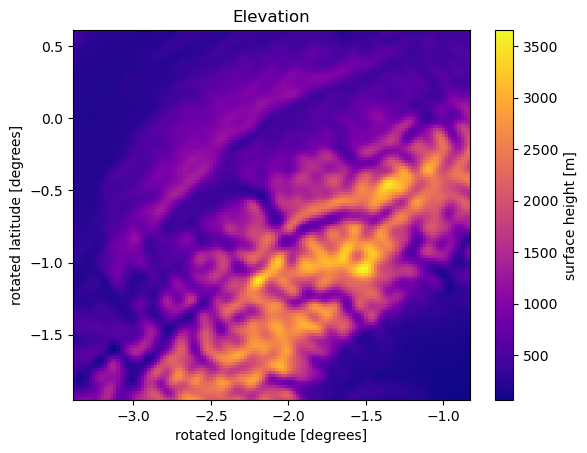

In [206]:
ds = xr.open_mfdataset(os.path.join(data_path, "dem_squares", "6_5_*"))
ds["HSURF"].plot(cmap="plasma")
plt.title("Elevation")
plt.show()
